# Overview  

I am working through the material in the Penn State online class STAT 501 Regression Methods. 

This Notebook is an attempt to translate the concepts and examples illustrated in the class into R

This lesson primarily introduces the simple linear regression (SLR) model.  

The four conditions for inferences from the SLR model are that the errors ei are (1) independent (2) normally distributed random variables with (3) mean zero (linearity) and (4) constant variance σ2.

Concept of ANOVA. 

The coefficient of determination, R2 is the ratio of the sum of squared residuals over the total sum of squares r2=SSR/SST. 

The Pearson correlation coefficient r is the square root of r2 with sign equal to that of the slope parameter β1.

Hypothesis tests (t-test of H0:β1=0, or ANOVA F-test for H0:β1=0) of the population correlation ρ when it is not obvious which variable should be regarded as the response.  

References : STAT501 : https://online.stat.psu.edu/stat501/ 

# Data Management  
This lesson uses several data files. We load them right away in this section  because the lessons often refer to data files multiple times.

### Loading required libraries

In [13]:
library(readr) ## reading data files
library(ggplot2) ## plotting data visualizations
library(dplyr) ## data manipluation

### Loading the datasets

In [2]:
# Skincancer is a .csv file.
# Mortality due to skin cancer (number of deaths per 10 million people), 
# and U.S. state latitude and longitude at center of state for n=49 states.
skincancer <- read.csv("skin_cancer.csv")
skincancer %>% head()

,State,Lat,Mort,Ocean,Long
,<fct>,<dbl>,<int>,<int>,<dbl>
1,Alabama,33.0,219,1,87.0
2,Arizona,34.5,160,0,112.0
3,Arkansas,35.0,170,0,92.5
4,California,37.5,182,1,119.5
5,Colorado,39.0,149,0,105.5
6,Connecticut,41.8,159,1,72.8


In [3]:
# student_height_weight is a tab-delimited data file.
# Height (inches) and weight (pounds) for n=10 students.
path = 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01/student_height_weight.txt'
student <- read.table(path, sep = '\t', header = TRUE)
head(student)

,ht,wt
,<int>,<int>
1,63,127
2,64,121
3,66,142
4,69,157
5,69,162
6,71,156


In [4]:
# bldgstories is a tab-delimited data file.
# Buiding height (feet) and number of stories for n=60 buildings.
# In this case, the header includes a space character that confuses R.  Work 
# around the issue by skipping the first line, then manually setting the 
# column headers using colnames.
path <- 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01//bldgstories.txt'
bldgstories <- read.table(path, sep = '\t', skip = 1)
colnames(bldgstories) <- c('YEAR', 'HGHT', 'STORIES')
head(bldgstories)

,YEAR,HGHT,STORIES
,<int>,<int>,<int>
1,1990,770,54
2,1980,677,47
3,1990,428,28
4,1989,410,38
5,1966,371,29
6,1976,504,38


In [5]:
# signdist is a tab-delimited data file.
# Driver age (years) and maximum distance (feet) at which the driver can read 
# a road sign for n=30 drivers.
path <- 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01//signdist.txt'
signdist <- read.table(path, sep = '\t', header = TRUE)
head(signdist)

,Age,Distance
,<int>,<int>
1,18,510
2,20,590
3,22,560
4,23,510
5,23,460
6,25,490


In [6]:
# heightgpa is a tab-delimited data file.
# Student height (inches) and academic performance (gpa) for n=35 students.
path <- 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01//heightgpa.txt'
heightgpa <- read.table(path, sep = '\t', header = TRUE)
head(heightgpa)

,height,gpa
,<dbl>,<dbl>
1,66.0,2.90
2,57.0,3.16
3,64.5,3.62
4,62.0,2.00
5,69.5,3.45
6,65.0,2.80


In [7]:
# husbandwife is a tab-delimited data file.
# Husband and wife age and height for n=218 couples.
# Note the "*" in data represents null. 
# Transform the variables from # character to numerics.
path <- 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01//husbandwife.txt'
husbandwife <- read.table(path, sep = '\t', header = TRUE)
husbandwife[husbandwife == "*"] <- NA
husbandwife <- transform(husbandwife, HAge = as.numeric(HAge))
husbandwife <- transform(husbandwife, HHght = as.numeric(HHght))
husbandwife <- transform(husbandwife, WAge = as.numeric(WAge))
husbandwife <- transform(husbandwife, WHght = as.numeric(WHght))
husbandwife <- transform(husbandwife, HAgeMar = as.numeric(HAgeMar))
head(husbandwife)

,HAge,HHght,WAge,WHght,HAgeMar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,100,24,27,11
2,6,109,10,22,5
3,21,22,12,33,23
4,33,82,38,16,12
5,39,9,33,3,16
6,13,38,9,41,9


In [8]:
# poverty is a tab-delimited data file.
# Poverty rate, teen birth rate for n=51 U.S. states (including D.C.).
path <- 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01/poverty.txt'
poverty <- read.table(path, sep = '\t', header = TRUE)
head(poverty)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,20.1,31.5,88.7,11.2,54.5
2,Alaska,7.1,18.9,73.7,9.1,39.5
3,Arizona,16.1,35.0,102.5,10.4,61.2
4,Arkansas,14.9,31.6,101.7,10.4,59.9
5,California,16.7,22.6,69.1,11.2,41.1
6,Colorado,8.8,26.2,79.1,5.8,47.0


# What is Simple Linear Regression (SLR)?

Simple linear regression is statistical method that allows us to summarize and study **relationships between two continuous (quantitative) variables**:  
(1) One variable, denoted by x, is regarded as the predictor, explanatory, or independent variable.  
(2) Second variable, denoted by y , is regarded as the response, outcome, or dependent variable.  

Simple linear regression gets its adjective "simple," because it concerns the study of only one predictor variable. In contrast, multiple linear regression, which we study later in this course, gets its adjective "multiple," because it concerns the study of two or more predictor variables  

Here is an example of a statistical relationship. Data set skincancer records one observation per U.S. state (n=49). The response variable mort is the mortality due to skin cancer (number of deaths per 10 million people) and the explanatory variable lat is the latitude (degrees North) at the center of each of 49 states in the U.S.

`geom_smooth()` using formula 'y ~ x'



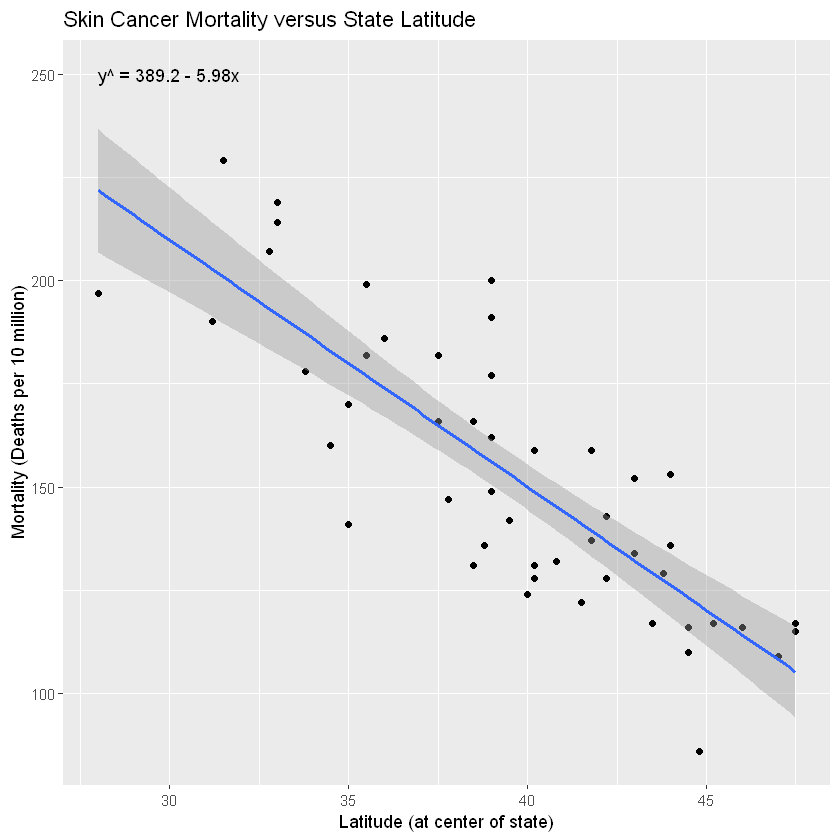

In [9]:
ggplot(skincancer, aes(y=Mort, x=Lat))+
  annotate("text", x = 30, y = 250, label = "y^ = 389.2 - 5.98x") +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Mortality (Deaths per 10 million)") +
  xlab("Latitude (at center of state)") +
  ggtitle("Skin Cancer Mortality versus State Latitude")

You might anticipate that if you lived in the higher latitudes of the northern U.S., the less exposed you'd be to the harmful rays of the sun, and therefore, the less risk you'd have of death due to skin cancer. The scatter plot supports such a hypothesis. There appears to be a negative linear relationship between latitude and mortality due to skin cancer, but the relationship is not perfect. Indeed, the plot exhibits some **trend,** but it also exhibits some **scatter.** Therefore, it is a statistical relationship, not a deterministic one.

Some other examples of statistical relationships might include:  
Height and weight — as height increases, you'd expect the weight to increase, but not perfectly.  
Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.  
Vital lung capacity and pack-years of smoking — as the amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.  
Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.

# What is the "Best Fitting Line"?  

The difference between the actual value and the predicted value is the residual ei=yi−yi^. Ordinary Least Squares (OLS) minimizes the sum of squared residuals. The resulting least squares line passes through the point (x¯,y¯).This is the **best fitting line**

In the skincancer example, the fitted line was Mort ~ Lat. The parameter estimator for lat is -5.98, meaning one additional degree of northerly latitude is associated with 5.98 less deaths per 10 million of population.

In [10]:
summary(lm(Mort ~ Lat, data = skincancer))


Call:
lm(formula = Mort ~ Lat, data = skincancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.972 -13.185   0.972  12.006  43.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1894    23.8123   16.34  < 2e-16 ***
Lat          -5.9776     0.5984   -9.99 3.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.12 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


Consider another example, the relationship between weight and height. Data set student_height_weight records one observation per student (n=10). The response variable ht is the student height (inches) and the explanatory variable wt is the student weight (pounds).

`geom_smooth()` using formula 'y ~ x'



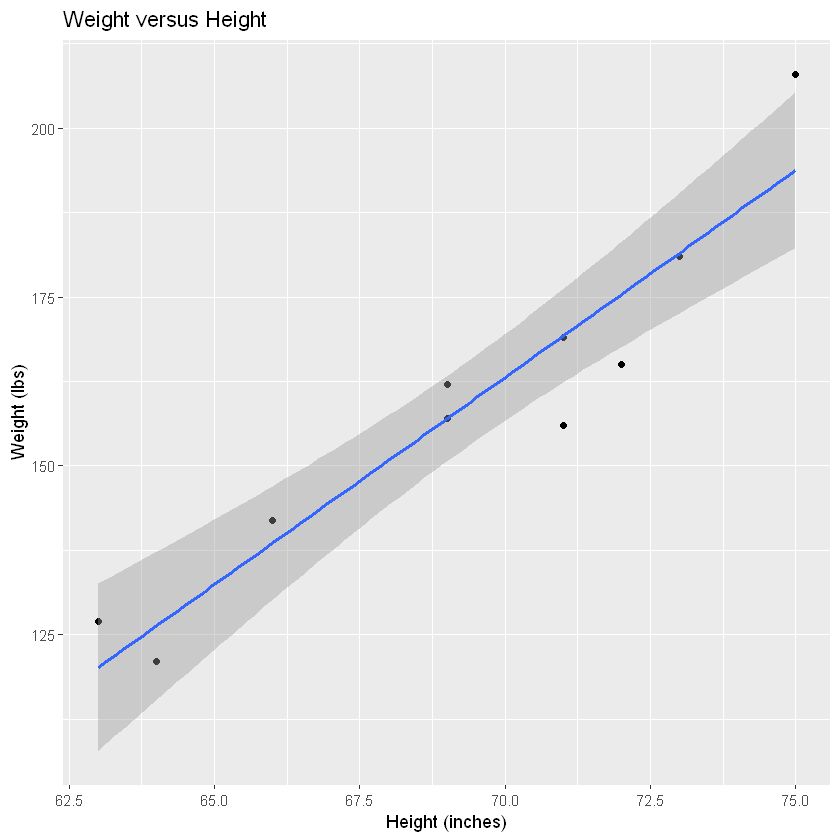

In [11]:
ggplot(student, aes(y=wt, x=ht)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Weight (lbs)") +
  xlab("Height (inches)") +
  ggtitle("Weight versus Height")

In this example, the fitted line is wt ~ ht. The parameter estimator for ht is 6.1376, meaning each additional inch of height is associated with 6.14 additional pounds of weight among the population of students targeted in the sample.

In [12]:
summary(lm(wt ~ ht, data = student))


Call:
lm(formula = wt ~ ht, data = student)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2339  -4.0804  -0.0963   4.6445  14.2158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -266.5344    51.0320  -5.223    8e-04 ***
ht             6.1376     0.7353   8.347 3.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.641 on 8 degrees of freedom
Multiple R-squared:  0.897,	Adjusted R-squared:  0.8841 
F-statistic: 69.67 on 1 and 8 DF,  p-value: 3.214e-05


# The Simple Linear Regression Model

**The formal definition of Simple Linear Regression:**  

Let n pairs of observations (𝑥𝑖, 𝑦𝑖), i = 1, 2, …, n, be available on two features, one of which is assumed to depend on the other. Typically Y denotes the dependent variable and X the independent variable. Let the quantity 𝐸(𝑌) denote the expected or mean value of 𝑌.

Simple linear regression relates the response Y to the single predictor variable X through a straight line. The mathematical formulation of the simple linear regression line is: **𝐸(𝑌)=𝛽0 +𝛽1 𝑋** where,
𝑌: is the value of the continuous response (or dependent) variable,
𝛽0 and 𝛽1: are intercept and slope coefficients, respectively, and known as the regression parameters.
𝑋: represents the independent (predictor) variable continuous in nature.  

It is assumed that the expected value of the response is a linear function of the predictor.When 𝛽0 and 𝛽1are known, a given value of the predictor will specify the expected value of the response.However, since Y is a random variable, not all values 𝑦𝑖 will be equal to 𝐸(𝑌).   

Another form of SLR equation is **𝑌𝑖=𝛽0 +𝛽1 𝑋𝑖 + 𝜀𝑖, i = 1, 2, …,n**  
𝜖: represents the unobservable error term. Note that error here does not indicate any mistake, simply the difference between the expected and observed values of the response.  

The error terms provide crucial insight into the regression process.  

**The method of Ordinary Least Square (OLS)** 

The simple linear regression model involves unknown parameters 𝛽0 and 𝛽1, which need to be estimated from data. There are several different methods of estimating the parameters. The simplest and the most widely used method is known as the Ordinary Least Squares method (OLS).  

Given 𝑛 pairs of observations on 𝑌 and 𝑋, the objective is to minimise the sum of squared errors and thus get appropriate estimates of 𝛽0 and 𝛽1. We want to minimise **Σ𝜖𝑖2𝑛𝑖=1=Σ(𝑌𝑖−𝛽0−𝛽1𝑋𝑖)2𝑛𝑖=1.**

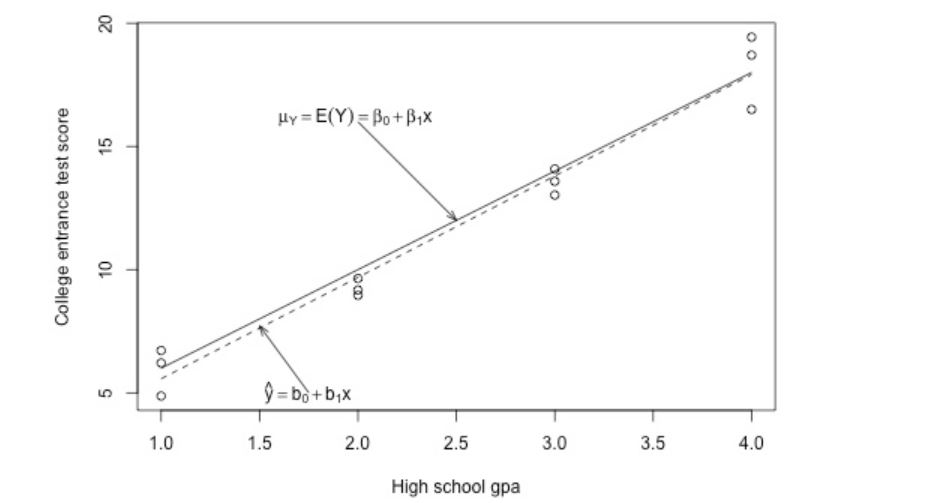

As the plot above suggests, the least squares regression line y^=b0+b1x through the sample of 12 data points estimates the population regression line μY=E(Y)=β0+β1x. That is, the sample intercept b0 estimates the population intercept β0 and the sample slope b1 estimates the population slope β1.  

**Assumptions of Linear Regression**  
The least squares regression line doesn't match the population regression line perfectly, but it is a pretty good estimate. 
In order to draw any conclusions about the population parameters β0 and β1, we have to make a few more assumptions about the behavior of the data in a regression setting.  

There are four conditions that comprise "the simple linear regression model:  
**(1)Linear Function:** The mean of the response, E(Yi), at each value of the predictor, xi, is a Linear function of the xi.  
**(2)Independent:** The errors, ϵi, are Independent.  
**(3)Normally Distributed:** The errors, ϵi, at each value of the predictor, xi, are Normally distributed.  
**(4)Equal variances (denoted σ2):** The errors, ϵi, at each value of the predictor, xi, have Equal variances (denoted σ2).  

An equivalent way to think of the first (linearity) condition is that the mean of the error, E(ϵi), at each value of the predictor, xi, is zero. 

**An alternative way to describe all four assumptions is that the errors, ϵi, are independent normal random variables with mean zero and constant variance, σ2.**

# What is The Common Error Variance? 

The common error variance σ2 is estimated by the mean squared error **MSE=∑(yi−yi^)2/(n−2)** where the numerator is the sum of squared errors (SSE). The n-2 is the degrees of freedom (2 for the intercept + explanatory variable)

`geom_smooth()` using formula 'y ~ x'



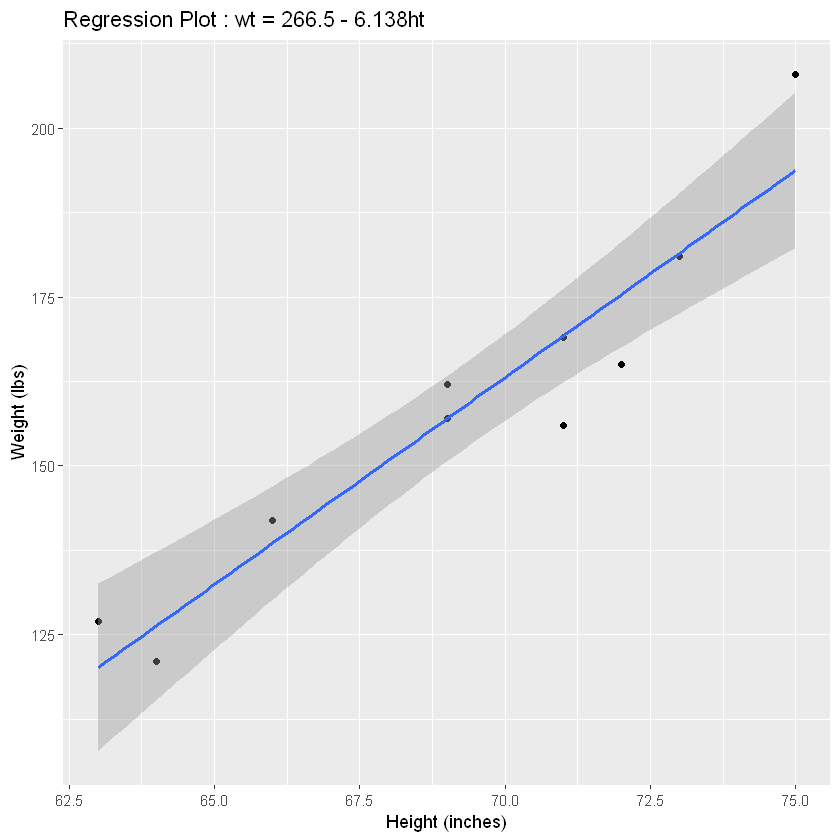

In [15]:
ggplot(student, aes(y=wt, x=ht)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Weight (lbs)") +
  xlab("Height (inches)") +
  ggtitle("Regression Plot : wt = 266.5 - 6.138ht ")

In [16]:
summary(lm(wt ~ ht, data = student))


Call:
lm(formula = wt ~ ht, data = student)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2339  -4.0804  -0.0963   4.6445  14.2158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -266.5344    51.0320  -5.223    8e-04 ***
ht             6.1376     0.7353   8.347 3.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.641 on 8 degrees of freedom
Multiple R-squared:  0.897,	Adjusted R-squared:  0.8841 
F-statistic: 69.67 on 1 and 8 DF,  p-value: 3.214e-05


The estimate of σ2 shows up in the summary of the "Regression Model".  

For example, for the student height and weight data (Student Height Weight data), the **"Residual standard error S=8.641"**, is the square root of MSE.  

That is, in general, S=sqrt(MSE), which estimates **σ** and is known as the **regression standard error or the residual standard error**. 

The Summary of the Regression Model tells us, therefore, that **MSE=(8.641)^2 =74.67.**

In [20]:
anova(lm(wt ~ ht, data = student))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ht,1,5202.214,5202.21405,69.66637,3.213764e-05
Residuals,8,597.386,74.67324,NA,NA


In the Analysis of Variance table, the value of MSE, 74.67, appears appropriately under the column labeled Mean Sq (for Mean Square) and in the row labeled Residuals.

# The Coefficient of Determination, r2  

The coefficient of determination R2 is a summary measure that explains how well the sample regression line fits the data. The rationale and computation of R2 is discussed below:  

Let *𝑌𝑖̂=𝛽̂0+𝛽̂1𝑋𝑖* &*𝑌̅=1/𝑛(Σ𝑌𝑖𝑛𝑖=1)*. 𝑌𝑖̂ is the estimated value of the response, for a given value of the predictor 𝑋𝑖. 

Not all predicted values of the response will be equal to the observed value 𝑌𝑖.  

In fact it may well happen that none of the estimated values of the response coincides with the corresponding observed values.The difference between the observed and the estimated values of the response is called residual. 
Residual is the estimated value of the unobserved error component in the regression equation.*𝜖̂𝑖 = 𝑌𝑖 - 𝑌̂𝑖*  

Residuals are very important part of regression and they have many useful properties.  

Σ(𝑌𝑖2−𝑌̅)2𝑛𝑖=1: is the total variation of the actual 𝑌 about their sample mean and termed as the total sum of squares (SST). This is closely linked to the sample variance of Y.  

Σ(𝑌̂𝑖−𝑌̅)2𝑛𝑖=1 : is the sum of squares due to regression and is called regression sum of squares (SSR)  

Σ𝜖̂𝑖2𝑛𝑖=1=Σ(𝑌𝑖−𝑌̂𝑖)2𝑛𝑖=1 : is the sum of squared differences between the observed and the predicted values of the response. This is known as the residual sum of squares or the error sum of squares (SSE)  

**𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸**  

**1=𝑆𝑆𝑅/𝑆𝑆𝑇+𝑆𝑆𝐸/𝑆𝑆𝑇 (on dividing SST on both sides)**  

**We now define R2 as : R2=𝑆𝑆𝑅/𝑆𝑆𝑇 or R2=1− 𝑆𝑆𝐸/𝑆𝑆𝑇**

The numerical value of 𝑅2 is equal to the square of the correlation coefficient between the response and the predictor only if there is a single predictor in the linear regression model, i.e. for simple linear regression only.
𝑅2 measures the proportion of the total variation in 𝑌 that is explained by the regression model. 

It ranges from 0≤𝑅2≤1. The higher the value of 𝑅2, the more powerful is the predictor to predict the response.  

A regression model with high 𝑅2 value indicates that the model fits the data well. In that case a high proportion of variance in the response is explained by the dependence of the response on the predictor.


### Characteristics of r2  
Here are some basic characteristics of the measure:  
(1) Since r2 is a proportion, it is always a number between 0 and 1. 

(2) If r2 = 1, all of the data points fall perfectly on the regression line. The predictor x accounts for all of the variation in y!   

(3) If r2 = 0, the estimated regression line is perfectly horizontal. The predictor x accounts for none of the variation in y!

### Interpretation of r2  

We've learned the interpretation for the two easy cases — when r2 = 0 or r2 = 1 — but, how do we interpret r2 when it is some number between 0 and 1, like 0.23 or 0.57, say? Here are two similar, yet slightly different, ways in which the coefficient of determination r2 can be interpreted. 
We say either:  
(1) "r2×100 percent of the variation in y is reduced by taking into account predictor x"
or:  
(2) "r2×100 percent of the variation in y is 'explained by' the variation in predictor x."

Many statisticians prefer the first interpretation.  The risk with using the second interpretation is that it can be misunderstood as suggesting that the predictor x causes the change in the response y.   

Association is not causation. That is, just because a dataset is characterized by having a large r-squared value, it does not imply that x causes the changes in y. As long as you keep the correct meaning in mind, it is fine to use the second interpretation. 

A variation on the second interpretation is to say, "r2×100 percent of the variation in y is accounted for by the variation in predictor x."

Let's revisit the skin cancer mortality example (Skin Cancer Data). Any statistical software that performs a simple linear regression analysis will report the r-squared value for you.

In [26]:
print("Regression Model Summary")
summary(lm(Mort ~ Lat, data = skincancer))

print("Regression Analysis of Variance")
anova(lm(Mort ~ Lat, data = skincancer))

[1] "Regression Model Summary"



Call:
lm(formula = Mort ~ Lat, data = skincancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.972 -13.185   0.972  12.006  43.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1894    23.8123   16.34  < 2e-16 ***
Lat          -5.9776     0.5984   -9.99 3.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.12 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


[1] "Regression Analysis of Variance"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Lat,1,36464.20,36464.2002,99.79683,3.309456e-13
Residuals,47,17173.07,365.3844,NA,NA


In the skin cancer example above, R-squared(r2) =.6798 i.e. 67.98%

We can say that 68% of the variation in the skin cancer mortality rate is reduced by taking into account latitude. 

Or  

We can say that 68% of the variation in skin cancer mortality is 'due to' or is 'explained by' latitude.

# (Pearson) Correlation Coefficient, r 

The correlation coefficient, r, is directly related to the coefficient of determination r2. 

If r2 is represented in decimal form, e.g. 0.39 or 0.87, then all we have to do to obtain r is to take the square root of r2 , with sign equal to that of the slope parameter b1 of the regression line.  

If b1 is negative, then r takes a negative sign.

If b1 is positive, then r takes a positive sign.

This implies that, the estimated slope (b1) and the correlation coefficient (r) always share the same sign. 

Furthermore, because r2 is always a number between 0 and 1, the correlation coefficient r is always a number between -1 and 1.

One advantage of r is that it is unitless, allowing researchers to make sense of correlation coefficients calculated on different data sets with different units

If the estimated slope b1 of the regression line is 0, then the correlation coefficient r must also be 0

The Pearson correlation coeficient in the skin cancer example is sqrt(.6798) i.e. **−.825** since the slope of the "Lat" parameter is "negative"

In [27]:
summary(lm(Mort ~ Lat, data = skincancer)) # summary of linear model


Call:
lm(formula = Mort ~ Lat, data = skincancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.972 -13.185   0.972  12.006  43.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1894    23.8123   16.34  < 2e-16 ***
Lat          -5.9776     0.5984   -9.99 3.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.12 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


In [29]:
cor(skincancer$Mort, skincancer$Lat) # correlation coefficient

[1] -0.8245178

### Examples of Correlation Coefficients

#### Building Heights
Consider the example, the relationship between building height and the number of stories. 

Data set bldgstories records one observation per building (n=60). 

The response variable HGHT is the building height (feet) and the explanatory variable STORIES is the number of floors in the building.

**The Model summary reports r2 = 0.9036.** 

**The Pearson correlation coeficient r = 0.951 indicates a strong positive linear relationship.**

**The relationship is positive. As the # of Stories increase, the Building Height increases (linearly)**

In [40]:
summary(lm(HGHT~STORIES , data = bldgstories))


Call:
lm(formula = HGHT ~ STORIES, data = bldgstories)

Residuals:
     Min       1Q   Median       3Q      Max 
-156.759  -33.239    5.995   28.450  167.487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.3096    20.9622   4.308 6.44e-05 ***
STORIES      11.2924     0.4844  23.310  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.33 on 58 degrees of freedom
Multiple R-squared:  0.9036,	Adjusted R-squared:  0.9019 
F-statistic: 543.4 on 1 and 58 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



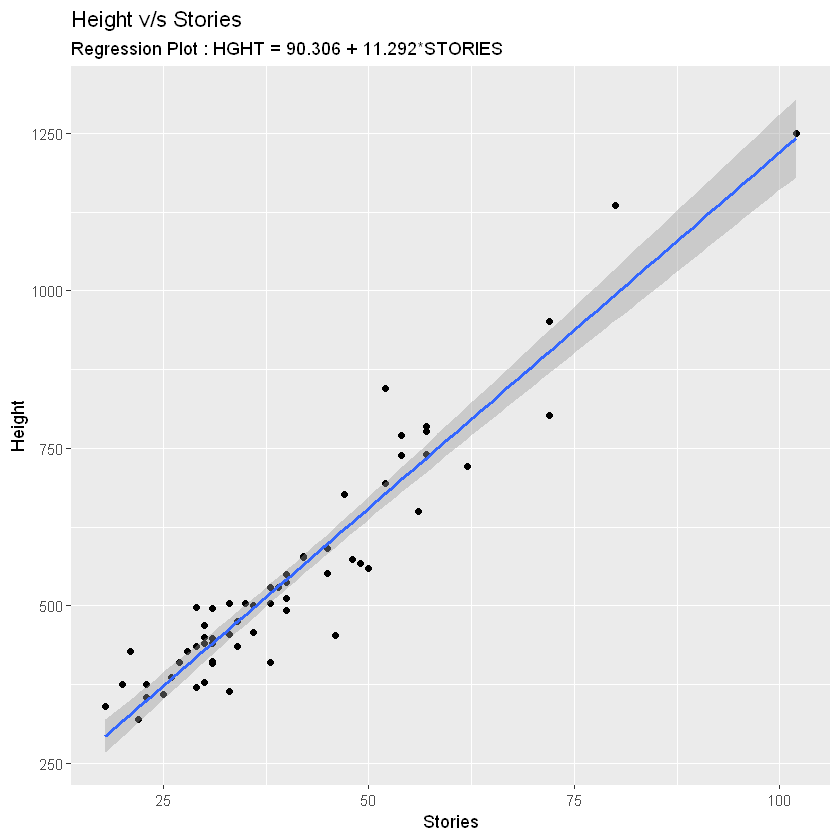

In [41]:
ggplot(bldgstories, aes(y=HGHT, x=STORIES)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Height") +
  xlab("Stories") +
  labs(title = "Height v/s Stories",
              subtitle = "Regression Plot : HGHT = 90.306 + 11.292*STORIES")

In [42]:
cor(bldgstories$HGHT, bldgstories$STORIES)

[1] 0.9505549

#### Driver age v/s distance of sight  
Consider an example, the relationship between driver age and the distance at which the driver can read a road sign. Data set signdist records one observation per driver (n=30). 

The response variable Distance is the maximum distance (feet) at which the driver can still read a road sign height and the explanatory variable Age is the driver’s age (years).  

**The Model summary reports r2 = 0.642.** 

**The Pearson correlation coeficient r = -0.801 indicates a fairly strong negative linear relationship.**

**The relationship is negative. As the Driver's Ageincreases, the Maximum distance for reading a road sign decreases (linearly)**

In [43]:
summary(lm(Distance~Age , data = signdist))


Call:
lm(formula = Distance ~ Age, data = signdist)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.231 -41.710   7.646  33.552 108.831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 576.6819    23.4709  24.570  < 2e-16 ***
Age          -3.0068     0.4243  -7.086 1.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.76 on 28 degrees of freedom
Multiple R-squared:  0.642,	Adjusted R-squared:  0.6292 
F-statistic: 50.21 on 1 and 28 DF,  p-value: 1.041e-07


`geom_smooth()` using formula 'y ~ x'



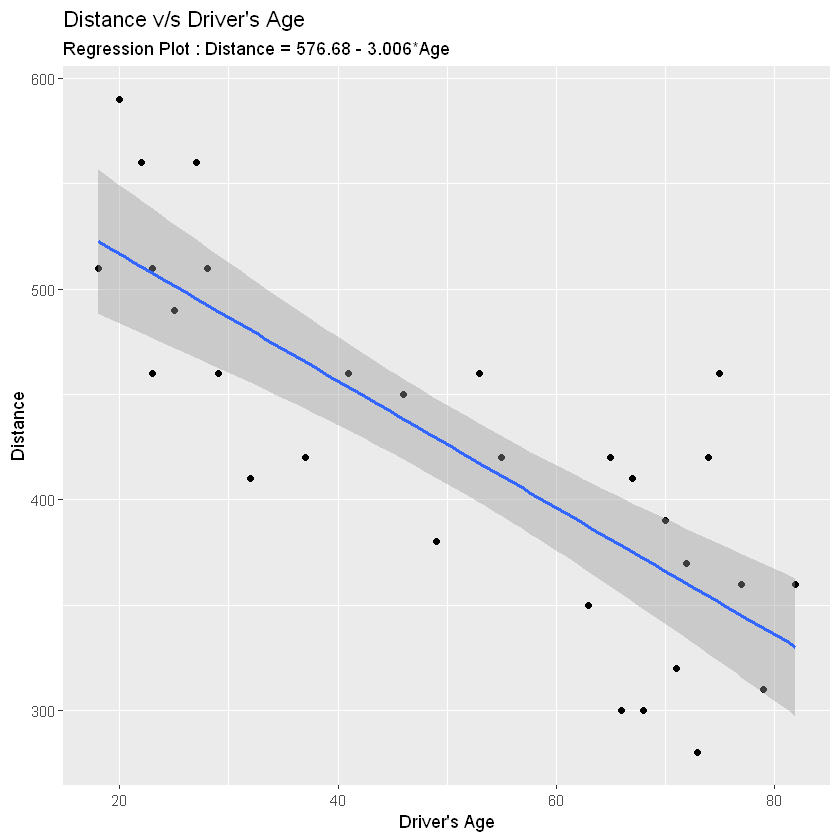

In [44]:
ggplot(signdist, aes(y=Distance, x=Age)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Distance") +
  xlab("Driver's Age") +
  labs(title = "Distance v/s Driver's Age",
              subtitle = "Regression Plot : Distance = 576.68 - 3.006*Age")

In [45]:
cor(signdist$Distance, signdist$Age)

[1] -0.8012447

#### Student Height and Acedamic Performance GPA  
Consider an example, the relationship between student height and academic performance grade point average.  

Data set heightgpa records one observation per student (n=35).  

The response variable gpa measures academic performance and the explanatory variable height is the student’s height (inches).

**The Model summary reports r2 = 0.0.003.** 

**The Pearson correlation coeficient r = -0.053 indicates no linear relationship (as expected!)**

**The r2 value tells us that only 0.3% of the variation in the grade point averages of the students in the sample can be explained by their height. In short, we would need to identify another more important variable, such as number of hours studied, if predicting a student's grade point average is important to us**

In [46]:
summary(lm(gpa~height , data = heightgpa))


Call:
lm(formula = gpa ~ height, data = heightgpa)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45081 -0.24878  0.00325  0.35622  0.90263 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.410214   1.434616   2.377   0.0234 *
height      -0.006563   0.021428  -0.306   0.7613  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5423 on 33 degrees of freedom
Multiple R-squared:  0.002835,	Adjusted R-squared:  -0.02738 
F-statistic: 0.09381 on 1 and 33 DF,  p-value: 0.7613


`geom_smooth()` using formula 'y ~ x'



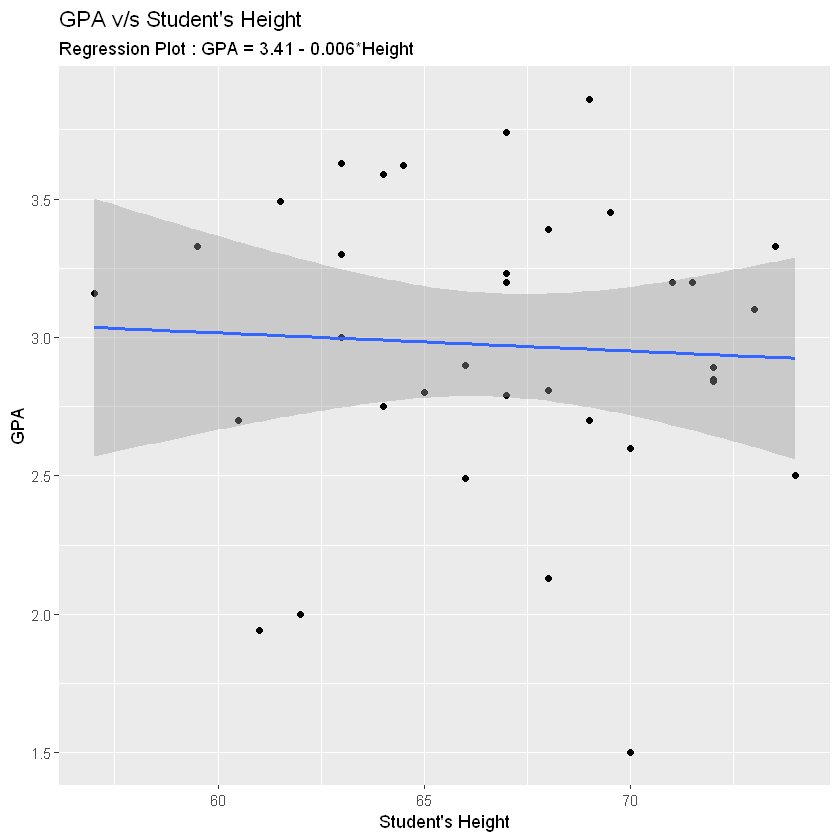

In [48]:
ggplot(heightgpa, aes(y=gpa, x=height)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("GPA") +
  xlab("Student's Height") +
  labs(title = "GPA v/s Student's Height",
              subtitle = "Regression Plot : GPA = 3.41 - 0.006*Height")

In [49]:
cor(heightgpa$gpa, heightgpa$height)

[1] -0.05324126

# r2 Cautions  
Unfortunately, the coefficient of determination r2 and the correlation coefficient r have to be the most often misused and misunderstood measures in the field of statistics. To ensure that you don't fall victim to the most common mistakes, we review a set of seven different cautions here  

**Caution 1**  
The coefficient of determination r2 and the correlation coefficient r quantify the strength of a linear relationship. It is possible that r2 = 0% and r = 0, suggesting there is no linear relation between x and y, and yet a perfect curved (or "curvilinear" relationship) exists.

**Caution 2**  
A large r2 value should not be interpreted as meaning that the estimated regression line fits the data well. Another function might better describe the trend in the data.  

**Caution 3**  
The coefficient of determination r2 and the correlation coefficient r can both be greatly affected by just one data point (or a few data points) i.e. sensitive outliers and leverage points.  

**Caution 4**   
Correlation (or association) does not imply causation. 
Association between the predictor x and response y should not be interpreted as implying that x causes the changes in y. There are many possible reasons for why there is an association between x and y, including:
* The predictor x does indeed cause the changes in the response y.  
* The causal relation may instead be reversed. That is, the response y may cause the changes in the predictor x.  
* The predictor x is a contributing but not sole cause of changes in the response variable y.  
* There may be a "lurking variable" that is the real cause of changes in y but also is associated with x, thus giving rise to the observed relationship between x and y.  
* The association may be purely coincidental

**Caution 5** 
Ecological correlations — correlations that are based on rates or averages — tend to overstate the strength of an association.
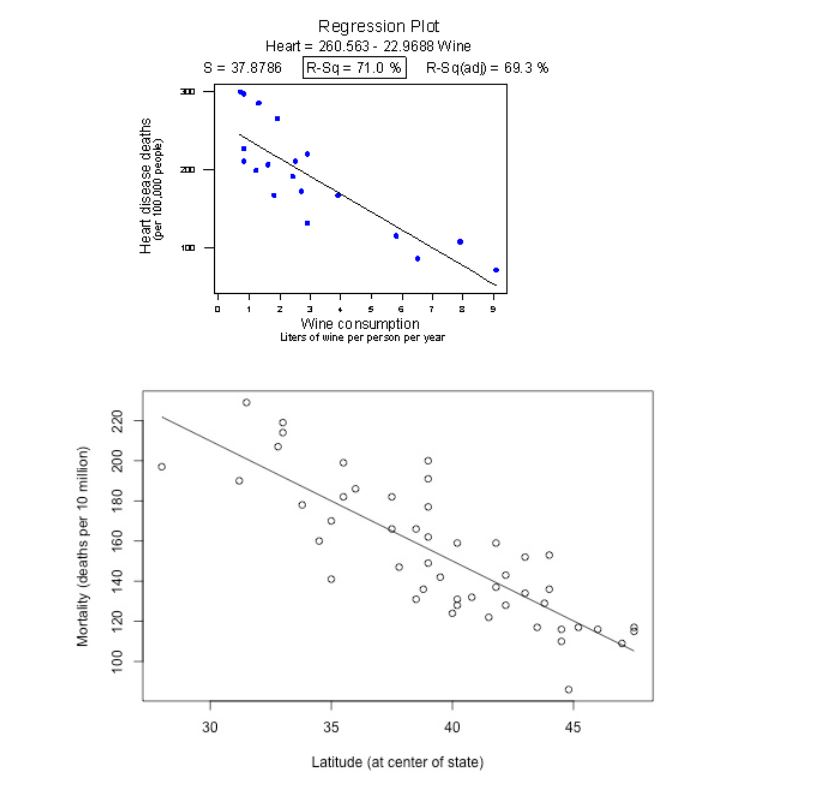

The correlation between wine consumption and heart disease deaths of 0.71 is an ecological correlation.The units are countries, not individuals.   
The correlation between skin cancer mortality and state latitude of 0.68 is also an ecological correlation. The units are states, again not individuals.   
In both cases, we should not use these correlations to try to draw a conclusion about how an individual's wine consumption or suntanning behavior will affect their individual risk of dying from heart disease or skin cancer.   
We shouldn't try to draw such conclusions anyway, because "association is not causation." 

**Caution 6**  
A "statistically significant" r2 value does not imply that the slope β1 is meaningfully different from 0.  

In general, the larger the data set, the easier it is to reject the null hypothesis and claim "statistical significance." If the data set is very large, it is even possible to reject the null hypothesis and claim that the slope β1 is not 0, even when it is not practically or meaningfully different from 0. It is possible to get a significant P-value when β1 is 0.13, a quantity that is likely not to be considered meaningfully different from 0.
The key here is that "statistical significance does not imply practical significance."  

**Caution 7** 
A large r2 value does not necessarily mean that a useful prediction of the response ynew, or estimation of the mean response μY, can be made. It is still possible to get prediction intervals or confidence intervals that are too wide to be useful.

## Examples of Cautions abour r2

#### A large r2 value does not imply that the estimated regression line fits the data well. 

The American Automobile Association has published data (Defensive Driving: Managing Time and Space, 1991) that looks at the relationship between the average stopping distance ( y = distance, in feet) and the speed of a car (x = speed, in miles per hour). The data set Car Stopping data contains 63 such data points.  
* Create a fitted line plot of the data. 
* Does a line do a good job of describing the trend in the data? 
* Interpret the r2 value. 
* Does car speed explain a large portion of the variability in the average stopping distance? i.e.is the r2 value large? 
* Summarize how the title of this section is appropriate

In [50]:
# Car Stopping Data.
# Speed (MPH) and Distance(Feet) for n=63.
path = 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01/carstopping.txt'
carstop <- read.table(path, sep = '\t', header = TRUE)
head(carstop)

,Speed,Distance
,<int>,<int>
1,0,0
2,10,20
3,20,50
4,30,95
5,40,150
6,50,220


[1] "Regression Model Summary"



Call:
lm(formula = Distance ~ Speed, data = carstop)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.738 -22.351  -7.738  16.622  47.083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.1667    22.0821   -2.00   0.0924 .  
Speed         5.6726     0.5279   10.75 3.84e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.21 on 6 degrees of freedom
Multiple R-squared:  0.9506,	Adjusted R-squared:  0.9424 
F-statistic: 115.5 on 1 and 6 DF,  p-value: 3.837e-05


[1] "Regression Analysis of Variance"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Speed,1,135150.149,135150.149,115.4846,3.836656e-05
Residuals,6,7021.726,1170.288,NA,NA


[1] "Correlation Between Speed and Stipping Distance"


[1] 0.9749928

`geom_smooth()` using formula 'y ~ x'



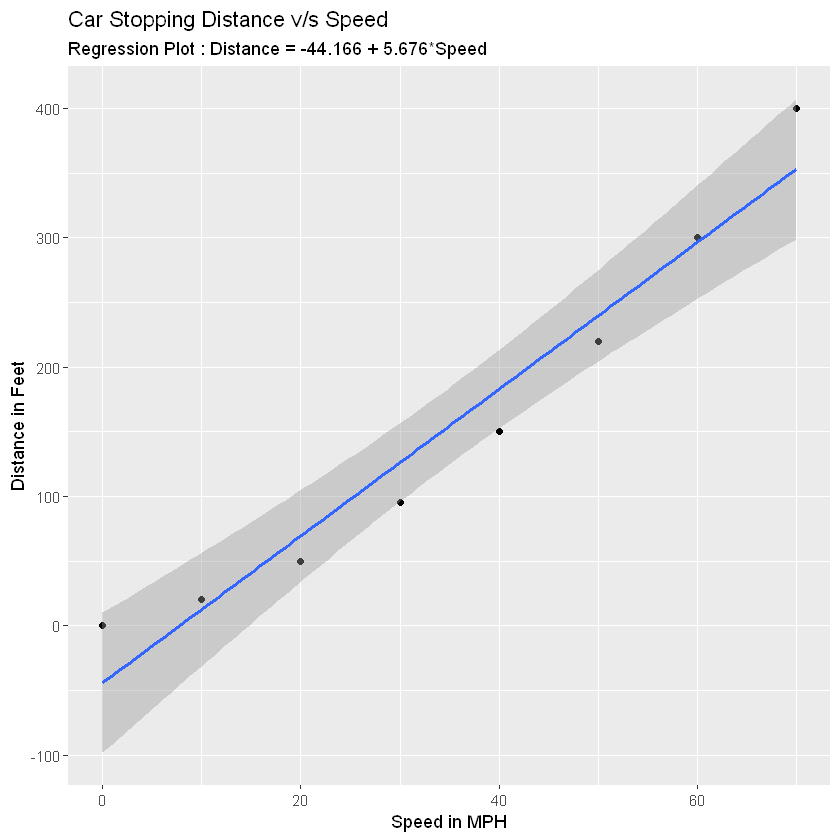

In [54]:
print("Regression Model Summary")
summary(lm(Distance~Speed , data = carstop))

print("Regression Analysis of Variance")
anova(lm(Distance~Speed , data = carstop))

print("Correlation Between Speed and Stipping Distance")
cor(carstop$Distance, carstop$Speed)

ggplot(carstop, aes(y=Distance, x=Speed)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Distance in Feet") +
  xlab("Speed in MPH") +
  labs(title = "Car Stopping Distance v/s Speed",
              subtitle = "Regression Plot : Distance = -44.166 + 5.676*Speed")

**Inference**  

1.1 - The plot shows a strong positive association between Stopping Distance and Speed that curves upwards slightly.

1.2 - Coefficient of Determination R2 = 95.1% of the sample variation in y = Stopping Distance can be explained by the variation in x = Speed. This is a relatively large value.

1.3 - The value of Correlation co-efficient r2 (97.44) is relatively high but the estimated regression line misses the curvature in the data.

#### One data point can greatly affect the r2 value  
The McCoo dataset contains data on the running back Eric McCoo's rushing yards (mccoo) for each game of the 1998 Penn State football season. It also contains Penn State's final score (score). 

Create a fitted line plot.  
Interpret the r2 value, and note its size.   
Remove the one data point in which McCoo ran 206 yards. Then, create another fitted line plot on the reduced data set. Interpret the r2 value.  
Upon removing the one data point, what happened to the r2 value?  

In [59]:
# McCoo Data.
# Rushing Yards(McCoo) Final Score(Score).
path = 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01/mccoo.txt'
mccoo <- read.table(path, sep = '\t', header = TRUE)
head(mccoo)
print(summary(mccoo))

,McCoo,Score
,<int>,<int>
1,51,34
2,52,48
3,21,20
4,2,9
5,56,27
6,163,31


     McCoo            Score      
 Min.   :  2.00   Min.   : 0.00  
 1st Qu.: 34.00   1st Qu.:14.50  
 Median : 52.00   Median :27.00  
 Mean   : 74.73   Mean   :26.45  
 3rd Qu.:109.00   3rd Qu.:37.50  
 Max.   :206.00   Max.   :51.00  


[1] "Regression Model Summary"



Call:
lm(formula = Score ~ McCoo, data = mccoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.581  -7.470   2.993   8.621  24.516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 16.68846    7.36724   2.265   0.0497 *
McCoo        0.13069    0.07557   1.729   0.1178  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.69 on 9 degrees of freedom
Multiple R-squared:  0.2494,	Adjusted R-squared:  0.166 
F-statistic: 2.991 on 1 and 9 DF,  p-value: 0.1178


[1] "Regression Analysis of Variance"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
McCoo,1,736.484,736.4840,2.990807,0.1177969
Residuals,9,2216.243,246.2493,NA,NA


[1] "Correlation Between Final Score and Rushing Yards"


[1] 0.4994247

`geom_smooth()` using formula 'y ~ x'



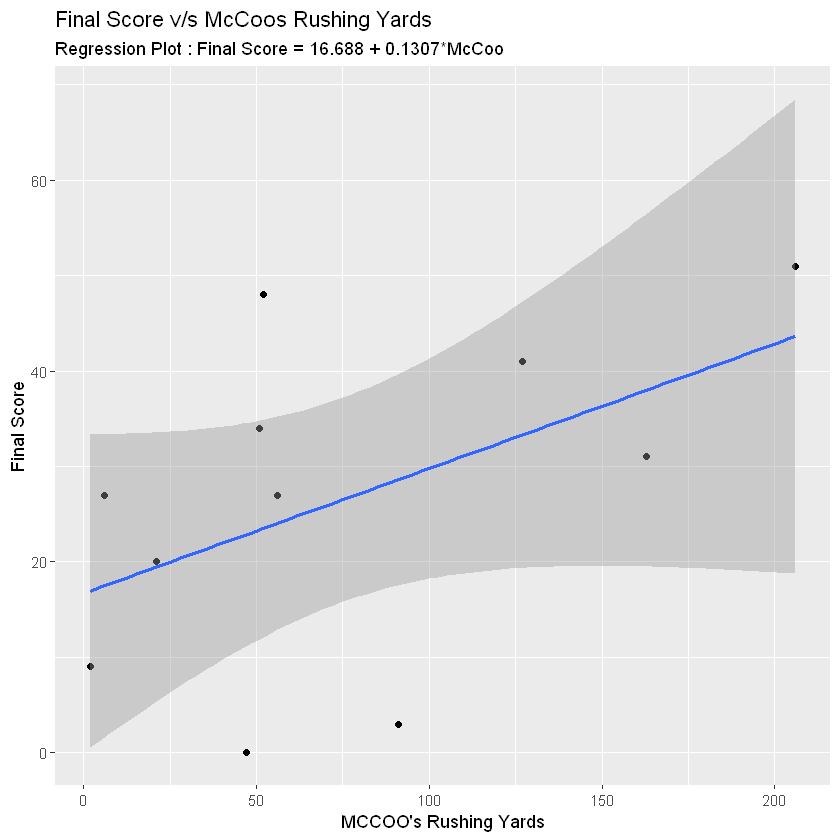

In [64]:
print("Regression Model Summary")
summary(lm(Score~McCoo , data = mccoo))

print("Regression Analysis of Variance")
anova(lm(Score~McCoo , data = mccoo))

print("Correlation Between Final Score and Rushing Yards")
cor(mccoo$Score , mccoo$McCoo)

ggplot(mccoo, aes(y=Score, x=McCoo)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Final Score") +
  xlab("MCCOO's Rushing Yards") +
  labs(title = "Final Score v/s McCoos Rushing Yards",
              subtitle = "Regression Plot : Final Score = 16.688 + 0.1307*McCoo")

**Inference**  
The plot shows a slight positive association between the variables with R2 = 24.9% of the sample variation in y = Score explained by the variation in McCoo.

In [62]:
# exclude the row where Rushing Yards = 206
mccoo2  <- mccoo %>% filter(McCoo != 206)
summary(mccoo2)

     McCoo            Score      
 Min.   :  2.00   Min.   : 0.00  
 1st Qu.: 27.50   1st Qu.:11.75  
 Median : 51.50   Median :27.00  
 Mean   : 61.60   Mean   :24.00  
 3rd Qu.: 82.25   3rd Qu.:33.25  
 Max.   :163.00   Max.   :48.00  

[1] "Regression Model Summary"



Call:
lm(formula = Score ~ McCoo, data = mccoo2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.544  -7.826   1.499  10.141  24.831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 18.66961    8.23175   2.268   0.0531 .
McCoo        0.08653    0.10445   0.828   0.4314  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.24 on 8 degrees of freedom
Multiple R-squared:  0.07901,	Adjusted R-squared:  -0.03611 
F-statistic: 0.6863 on 1 and 8 DF,  p-value: 0.4314


[1] "Regression Analysis of Variance"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
McCoo,1,736.484,736.4840,2.990807,0.1177969
Residuals,9,2216.243,246.2493,NA,NA


[1] "Correlation Between Final Score and Rushing Yards"


[1] 0.2810919

`geom_smooth()` using formula 'y ~ x'



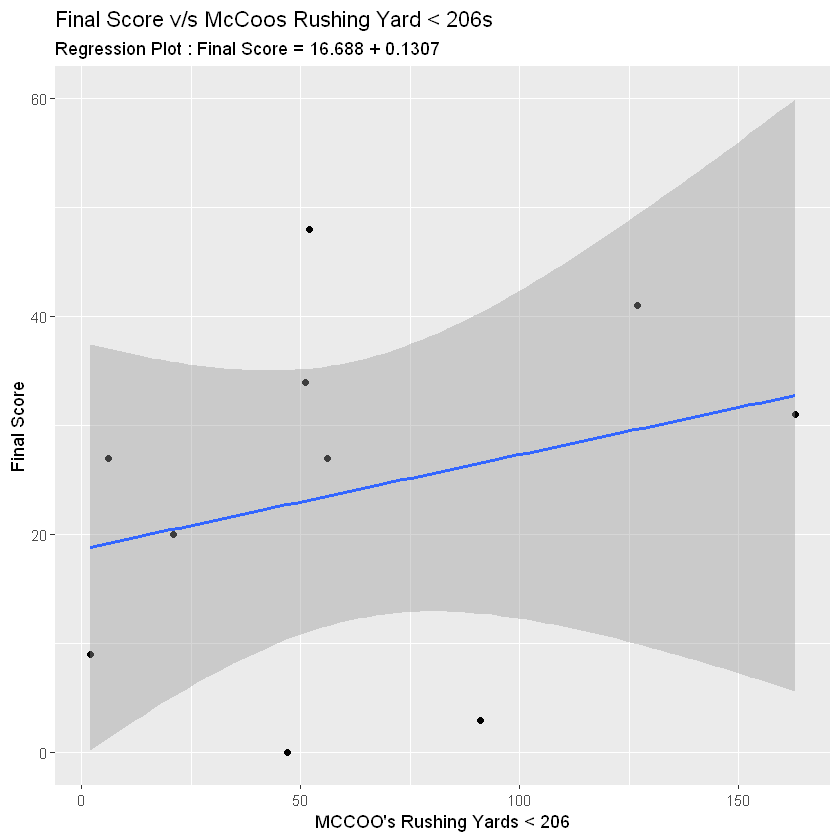

In [63]:
print("Regression Model Summary")
summary(lm(Score~McCoo , data = mccoo2))

print("Regression Analysis of Variance")
anova(lm(Score~McCoo , data = mccoo))

print("Correlation Between Final Score and Rushing Yards")
cor(mccoo2$Score , mccoo2$McCoo)

ggplot(mccoo2, aes(y=Score, x=McCoo)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Final Score") +
  xlab("MCCOO's Rushing Yards < 206") +
  labs(title = "Final Score v/s McCoos Rushing Yard < 206s",
              subtitle = "Regression Plot : Final Score = 18.66 + 0.0.08*McCoo")

**Inference**  
R2 decreases to just 7.9% on removal of the one data point with McCoo = 206 yards.

#### A large r-squared value does not necessarily imply useful predictions  
The Old Faithful dataset contains data on 21 consecutive eruptions of Old Faithful geyser in Yellowstone National Park. It is believed that one can predict the time until the next eruption (next), given the length of time of the last eruption (duration).  

* Quantify the degree of linear association between next and duration. i.e. determine and interpret the R2 value.

* Obtain a 95% prediction interval for the time until the next eruption if the last eruption lasted 3 minutes. 

* Interpret your prediction interval. 

* Suppose you are a "ratrace tourist" who knows that you can only spend up to one hour waiting for the next eruption to occur. Is the prediction interval too wide to be helpful to you?

In [66]:
# Old Faithful Data.
# Duration of Erruption(Duration) Next Erruption(Next) for n=21.
path = 'C:/Users/rmummiga/Documents/DATA FILES/REGRESSION_STATS_501/STAT501_Lesson01/oldfaithful.csv'
erruptions <- read.csv(path, header = TRUE)
head(erruptions)
print(summary(erruptions))

,duration,next.
,<dbl>,<int>
1,2.0,50
2,1.8,57
3,3.7,55
4,2.2,47
5,2.1,53
6,2.4,50


    duration         next.      
 Min.   :1.700   Min.   :43.00  
 1st Qu.:2.200   1st Qu.:53.00  
 Median :3.500   Median :62.00  
 Mean   :3.238   Mean   :62.71  
 3rd Qu.:4.000   3rd Qu.:72.00  
 Max.   :4.900   Max.   :85.00  


In [72]:
erruptions.lm = lm(next.~duration , data = erruptions)
print("Regression Model Summary")
summary(erruptions.lm)

[1] "Regression Model Summary"



Call:
lm(formula = next. ~ duration, data = erruptions)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2364  -4.2364  -0.6352   5.5327   9.9316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   31.013      4.417   7.022 1.10e-06 ***
duration       9.790      1.300   7.531 4.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.129 on 19 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.7359 
F-statistic: 56.72 on 1 and 19 DF,  p-value: 4.059e-07


**Inference** : R2 = 74.91% of the sample variation in next can be explained by the variation in duration. There is a relatively high degree of linear association between the variables.

`geom_smooth()` using formula 'y ~ x'



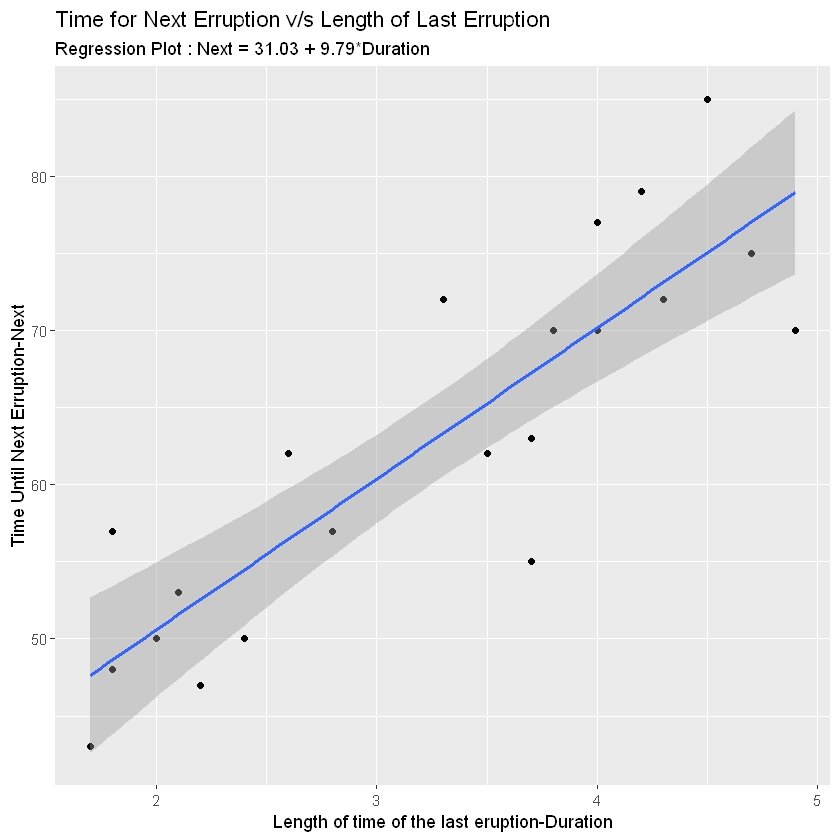

In [81]:
ggplot(erruptions, aes(y=next., x=duration)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Time Until Next Erruption-Next") +
  xlab("Length of time of the last eruption-Duration") +
  labs(title = "Time for Next Erruption v/s Length of Last Erruption",
              subtitle = "Regression Plot : Next = 31.03 + 9.79*Duration")

In [76]:
# We create a new data frame that set the duration of erruption to 3 minutes.
newdata = data.frame(duration=3)

In [83]:
# We now apply the predict function and set the predictor variable in the newdata argument. 
# We also set the interval type as "prediction", and use the default 0.95 confidence level. 
predict(erruptions.lm, newdata, interval="prediction")

,fit,lwr,upr
1,60.38332,47.2377,73.52893


**Inference**  
1) The 95% prediction interval is (47.23, 73.52), which means we’re 95% confident that the time until the next eruption if the last eruption lasted 3 minutes will be between 47.23 to 73.52 minutes.  
2) If we can only wait 60 minutes, this interval is too wide to be helpful to us since it extends beyond 60 minutes.

# Hypothesis Test for the Population Correlation Coefficient ρ  
The correlation coefficient r and the coefficient of determination R2  summarize the strength of a linear relationship in samples only.   
If we obtained a different sample, we would obtain different correlations, different R2 values, and therefore potentially different conclusions.   
We want to draw conclusions about populations, not just samples. To do so, we either have to conduct a hypothesis test or calculate a confidence interval.   
We will now asses how to conduct a hypothesis test for the population correlation coefficient ρ (the greek letter "rho").  

For evaluating whether or not a linear relationship exists between predictor and response , we can perform either of the following tests: 
* t-test for testing H0:β1=0  
* ANOVA F-test for testing H0:β1=0

### Steps for Hypothesis Testing for ρ  
* Step 1: Hypotheses Generation (specify the null and alternative hypotheses) :  
Null hypothesis H0:ρ=0  
Alternative hypothesis HA:ρ≠0 or HA:ρ<0 or HA:ρ>0


* Step 2: Test Statistic (calculate the value of the test statistic)


* Step 3: P-Value  
We use the resulting test statistic to calculate the P-value. As always, the P-value is the answer to the question "how likely is it that we’d get a test statistic t* as extreme as we did if the null hypothesis were true?" 


* Step 4: Decision : Finally, we make a decision  
*If the P-value is smaller than the significance level α, we reject the null hypothesis in favor of the alternative*. We conclude "there is sufficient evidence at the α level to conclude that there is a linear relationship in the population between the predictor x and response y.  
*If the P-value is larger than the significance level α , we fail to reject the null hypothesis* We conclude "there is not enough evidence at the  α level to conclude that there is a linear relationship in the population between the predictor x and response y.

### Example 1 : Husband and Wife Data
The relationship between the husband’s age and wife’s age does not have a clear explanatory and response varaible. 
Data set husbandwife records one observation per married couple (n=218).  
The response variable can be wife age WAge or husband age HAge while the explanatory variable is the other.  
We want to evaluate whether or not a linear relationship exists between a husband's age and his wife's age.  
Case 1 : Husband's Age is "response"  and Wife's Age is "predictor"   
Case 2 : Wife's Age is "response" and Husband's Age is "predictor"

In [84]:
head(husbandwife)

,HAge,HHght,WAge,WHght,HAgeMar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,100,24,27,11
2,6,109,10,22,5
3,21,22,12,33,23
4,33,82,38,16,12
5,39,9,33,3,16
6,13,38,9,41,9


#### Method 1 : cor() and cor.test()

In [86]:
w<-husbandwife$WAge # create a variable Wife Age
h<-husbandwife$HAge # create a variable Husband Age
a<-data.frame(age1=w, age2=h, grp="wife age vs husband age")
head(a)

,age1,age2,grp
,<dbl>,<dbl>,<fct>
1,24,30,wife age vs husband age
2,10,6,wife age vs husband age
3,12,21,wife age vs husband age
4,38,33,wife age vs husband age
5,33,39,wife age vs husband age
6,9,13,wife age vs husband age


In [87]:
df<-rbind(data.frame(age1=w, age2=h, grp="wife age vs husband age"),
          data.frame(age1=h, age2=w, grp="husband age vs wife age"))
head(df)

,age1,age2,grp
,<dbl>,<dbl>,<fct>
1,24,30,wife age vs husband age
2,10,6,wife age vs husband age
3,12,21,wife age vs husband age
4,38,33,wife age vs husband age
5,33,39,wife age vs husband age
6,9,13,wife age vs husband age


`geom_smooth()` using formula 'y ~ x'



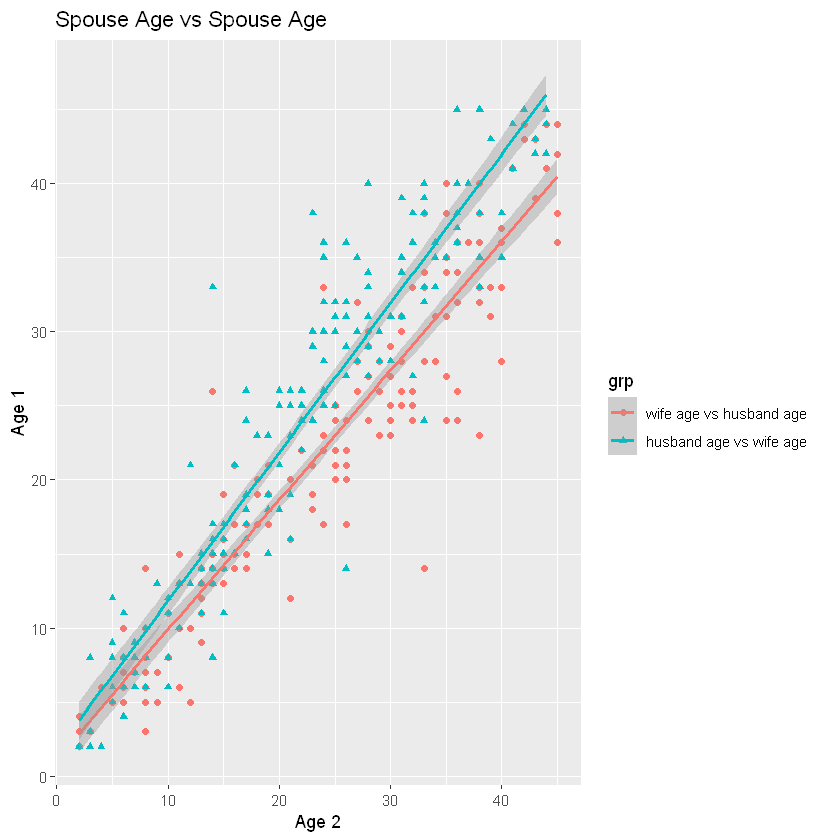

In [88]:
ggplot(na.omit(df), aes(y=age1, x=age2, group=grp, shape=grp, colour=grp)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Age 1") +
  xlab("Age 2") +
  ggtitle("Spouse Age vs Spouse Age")

* cor() computes the correlation coefficient.   
* cor. test() test for association/correlation between paired samples.It returns both the correlation coefficient and the significance level(or p-value) of the correlation .

In [90]:
print("Correlation Coefficient Husband's Age v/s Wife's Age")
cor(husbandwife$HAge, husbandwife$WAge, use="pairwise.complete.obs")

print("Correlation Coeffieient Wife's Age v/s Husband's Age")
cor(husbandwife$WAge,husbandwife$HAge, use="pairwise.complete.obs")

print("Correlation test between Husband's Age and Wife's Age")
cor.test(husbandwife$WAge, husbandwife$HAge, alternative = "two.sided")

[1] "Correlation Coefficient Husband's Age v/s Wife's Age"


[1] 0.937681

[1] "Correlation Coeffieient Wife's Age v/s Husband's Age"


[1] 0.937681

[1] "Correlation test between Husband's Age and Wife's Age"



	Pearson's product-moment correlation

data:  husbandwife$WAge and husbandwife$HAge
t = 34.975, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9165191 0.9536083
sample estimates:
     cor 
0.937681 


**Inference : p value is < 0.05 implying that Husband's Age and Wife's Age are correlated to each other**

#### Method 2 : t-Test on linear regression model

**Step 1 : Hypothesis Generation**

Null Hypothesis : H0 - ρ=0 --- Husband's Age and Wife's Age are not correlated  

Alternate Hypothesis : Ha - ρ≠0 --- Husband's Age and Wife's Age are correlated

**Step 2 : Test Statistic**

In [93]:
# Build a linear Regression model for Husband's Ages / Vs Wife's Age
hwmodel = lm(age1 ~ age2 , data = df)

In [106]:
# Summrise the Model and it's Coefficients
modelSummary <- summary(hwmodel)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
modelCoeffs

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.7894737,0.53938257,3.317634,1.006642e-03
age2,0.9221968,0.02103484,43.841388,1.631260e-141


In [102]:
# Geta Beta Estimates , Standard Error & T-Statistic
beta.estimate <- modelCoeffs["age2", "Estimate"]  # get beta estimate for speed

std.error <- modelCoeffs["age2", "Std. Error"]  # get std.error for speed

print("beta estimate for age2 is") 
beta.estimate

print("standard errors for age2 is") 
std.error

print("t-statistic for age2 is")
t_value <- beta.estimate/std.error  # calc t statistic
t_value

[1] "beta estimate for age2 is"


[1] 0.9221968

[1] "standard errors for age2 is"


[1] 0.02103484

[1] "t-statistic for age2 is"


[1] 43.84139

**Step 3 : p-value**

In [104]:
p_value <- 2*pt(-abs(t_value), df=nrow(df)-ncol(df))  # calc p Value
print("p-value is")
p_value

[1] "p-value is"


[1] 2.444829e-161

**Step 4 : Decision** 
Since the P-value is small — smaller than 0.05, say — we can reject the null hypothesis.  
*There is sufficient statistical evidence at the α=0.05 level to conclude that there is a significant linear relationship between a husband's age and his wife's age.*

### Example 2 :  Teen Birth Rate and Poverty Level Data  
This dataset of size n = 51 are for the 50 states and the District of Columbia in the United States (Poverty data).

The variables are :   
y = year 2002 birth rate per 1000 females 15 to 17 years old (Brth15to17) and   
x = poverty rate (PovPct), which is the percent of the state’s population living in households with incomes below the federally defined poverty level. 

(Data source: Mind On Statistics, 3rd edition, Utts and Heckard).

**Load and View Summary of the Data**

In [109]:
head(poverty)
summary(poverty)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,20.1,31.5,88.7,11.2,54.5
2,Alaska,7.1,18.9,73.7,9.1,39.5
3,Arizona,16.1,35.0,102.5,10.4,61.2
4,Arkansas,14.9,31.6,101.7,10.4,59.9
5,California,16.7,22.6,69.1,11.2,41.1
6,Colorado,8.8,26.2,79.1,5.8,47.0


       Location      PovPct        Brth15to17      Brth18to19    
 Alabama   : 1   Min.   : 5.30   Min.   : 8.10   Min.   : 39.00  
 Alaska    : 1   1st Qu.:10.25   1st Qu.:17.25   1st Qu.: 58.30  
 Arizona   : 1   Median :12.20   Median :20.00   Median : 69.40  
 Arkansas  : 1   Mean   :13.12   Mean   :22.28   Mean   : 72.02  
 California: 1   3rd Qu.:15.80   3rd Qu.:28.10   3rd Qu.: 87.95  
 Colorado  : 1   Max.   :25.30   Max.   :44.80   Max.   :104.30  
 (Other)   :45                                                   
   ViolCrime         TeenBrth    
 Min.   : 0.900   Min.   :20.00  
 1st Qu.: 3.900   1st Qu.:33.90  
 Median : 6.300   Median :39.50  
 Mean   : 7.855   Mean   :42.24  
 3rd Qu.: 9.450   3rd Qu.:52.60  
 Max.   :65.000   Max.   :69.10  
                                 

**Fit a Linear Regression Model**

In [111]:
m <- lm(Brth15to17 ~ PovPct, data = poverty)
summary(m)


Call:
lm(formula = Brth15to17 ~ PovPct, data = poverty)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2275  -3.6554  -0.0407   2.4972  10.5152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2673     2.5297   1.687    0.098 .  
PovPct        1.3733     0.1835   7.483 1.19e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.551 on 49 degrees of freedom
Multiple R-squared:  0.5333,	Adjusted R-squared:  0.5238 
F-statistic:    56 on 1 and 49 DF,  p-value: 1.188e-09


**Visualize the relationship between response and pridictor with linear model plotted**

`geom_smooth()` using formula 'y ~ x'



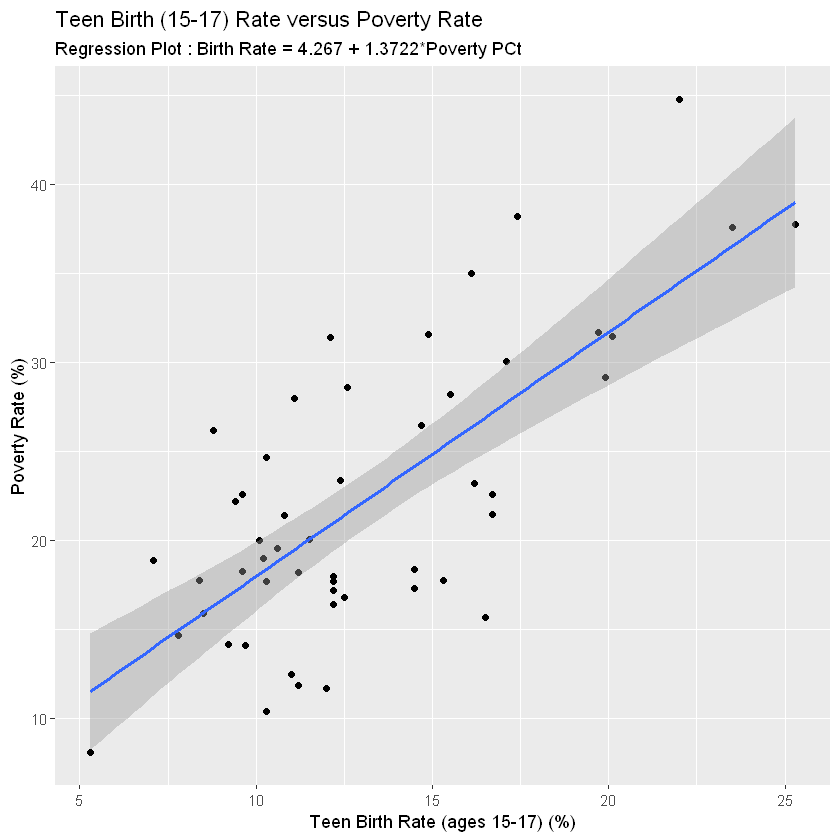

In [112]:
ggplot(poverty, aes(y=Brth15to17, x=PovPct)) +
  geom_point() +
  geom_smooth(method = "lm") +
  ylab("Poverty Rate (%)") +
  xlab("Teen Birth Rate (ages 15-17) (%)") +
  ggtitle("Teen Birth (15-17) Rate versus Poverty Rate") +
labs(subtitle = "Regression Plot : Birth Rate = 4.267 + 1.3722*Poverty PCt")

**Conduct Correlation test to validation significance of correlation**

In [113]:
cor.test(poverty$Brth15to17, poverty$PovPct, alternative = "two.sided")


	Pearson's product-moment correlation

data:  poverty$Brth15to17 and poverty$PovPct
t = 7.4832, df = 49, p-value = 1.188e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5692811 0.8373536
sample estimates:
      cor 
0.7302931 


**Inference** 

(1) The interpretation of the slope (value = 1.372) is that the 15 to 17-year-old birth rate increases 1.372 units, on average, for each one unit (one percent) increase in the poverty rate.  

(2) The interpretation of the intercept (value=4.267) is that if there were states with poverty rate = 0, the predicted average for the 15 to 17-year-old birth rate would be 4.267 for those states. Since there are no states with poverty rate = 0 this interpretation of the intercept is not practically meaningful for this example.(perhaps the variable should be centered)  

(3) The residual standard error (s=5.551)roughly indicates the average difference between the predicted and observed values.  

(4) The r-squared (R2=.5333) means poverty rates “explain” 53.33% of the observed variation in the 15 to 17 year old average birth rates of the states.  

(5) Correlation coefficient r = 0.73 with p value is < 0.05 implying that Teen Birth rate and Poverty are strongly correlated